**LEVEL 3**

🎯 Objective

To analyze how customer engagement (votes, sentiments) and service options (online delivery, table booking) relate to restaurant ratings and pricing levels.

🧩 Approach

1. Votes & Ratings: Cleaned data, calculated correlation, and visualized with scatter + regression plot.


2. Sentiment Analysis: Categorized ratings into Positive/Neutral/Negative and compared via boxplots.


3. Service & Price Range: Converted service columns to binary, grouped by price, and visualized with bar charts.



Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [4]:
df = pd.read_csv('/content/Dataset 1.csv')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**TASK 1 -Restaurant Reviews(Ratings and Votes Overview)**

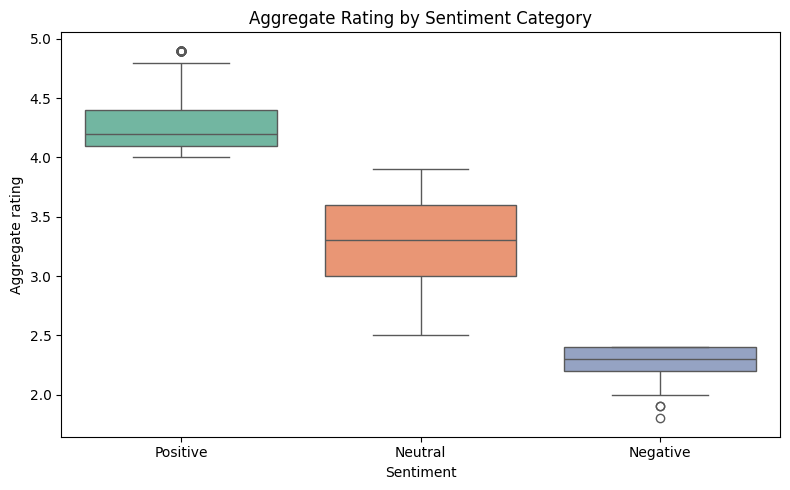

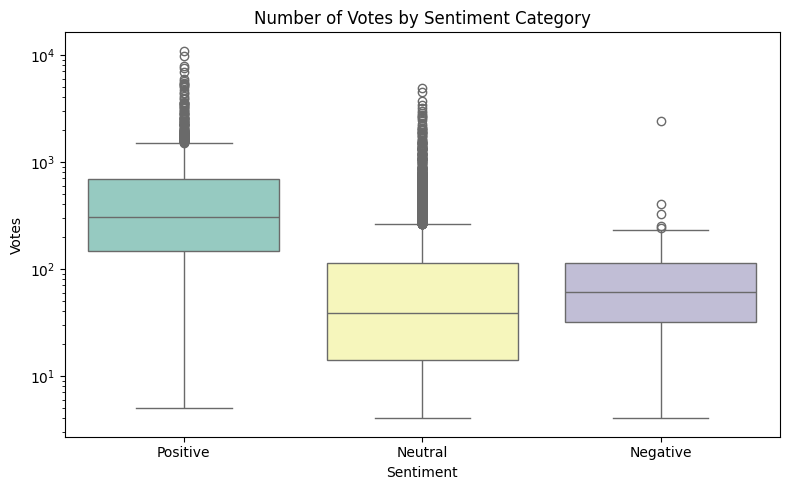

In [5]:
# Clean: Drop missing 'Rating text'
df = df.dropna(subset=['Rating text', 'Aggregate rating', 'Votes'])

# Map rating text to sentiment
sentiment_map = {
    'Excellent': 'Positive',
    'Very Good': 'Positive',
    'Good': 'Neutral',
    'Average': 'Neutral',
    'Poor': 'Negative',
    'Not rated': 'Unknown' }

df['Sentiment'] = df['Rating text'].map(sentiment_map)

# Filter out 'Unknown'
df = df[df['Sentiment'] != 'Unknown']

# Plot 1: Sentiment vs Aggregate Rating
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Sentiment', y='Aggregate rating', hue='Sentiment', palette='Set2', legend=False)
plt.title("Aggregate Rating by Sentiment Category")
plt.tight_layout()
plt.show()

# Plot 2: Sentiment vs Votes
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Sentiment', y='Votes', hue='Sentiment', palette='Set3', legend=False)
plt.yscale('log')  # votes can be skewed; log scale helps
plt.title("Number of Votes by Sentiment Category")
plt.tight_layout()
plt.show()


**TASK 2: Votes Analysis**

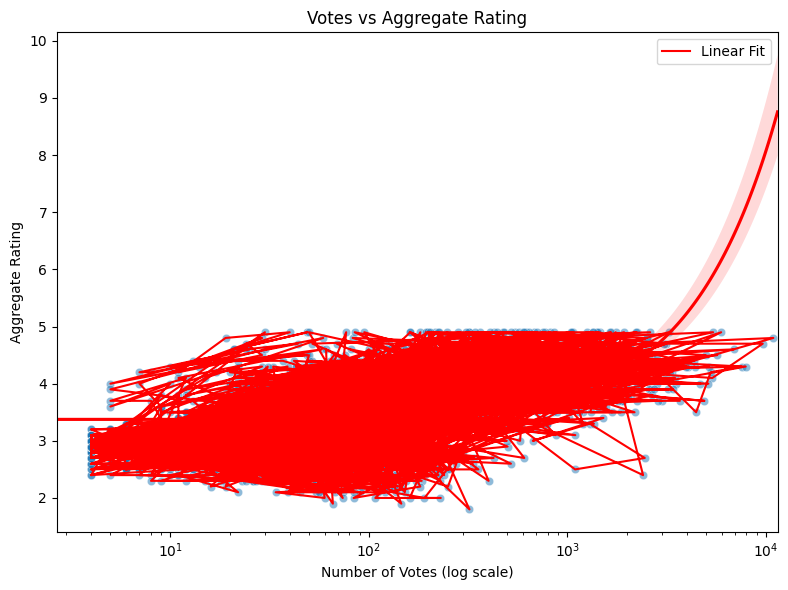

 Pearson Correlation: 0.4090


In [9]:
from scipy.stats import pearsonr
df = df.dropna(subset=['Aggregate rating', 'Votes'])
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Scatter Plot: Votes vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.5)
regplot = sns.regplot(data=df, x='Votes', y='Aggregate rating', scatter=False, color='red', truncate=False)
regplot.plot(df['Votes'], df['Aggregate rating'], label="Linear Fit", color='red')
plt.yscale('linear')
plt.xscale('log')  # log scale for better spread
plt.xlabel("Number of Votes (log scale)")
plt.ylabel("Aggregate Rating")
plt.title("Votes vs Aggregate Rating")
plt.legend()
plt.tight_layout()
plt.show()

# Correlation Coefficient
corr, _ = pearsonr(df['Votes'], df['Aggregate rating'])
print(f" Pearson Correlation: {corr:.4f}")

**TASK 3: Price Range vs Online Delivery and Table Booking analysis**

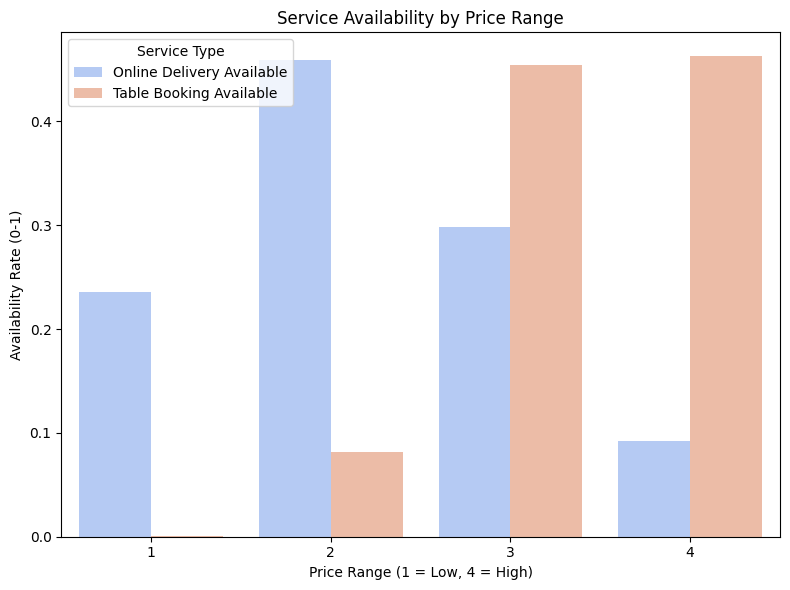

In [10]:
# Clean relevant columns
df = df.dropna(subset=['Price range', 'Has Online delivery', 'Has Table booking'])
df['Price range'] = pd.to_numeric(df['Price range'], errors='coerce')

# Normalize boolean-like columns
df['Has Online delivery'] = df['Has Online delivery'].str.strip().str.lower()
df['Has Table booking'] = df['Has Table booking'].str.strip().str.lower()

# Convert to binary: Yes → 1, No → 0
df['Online Delivery Available'] = df['Has Online delivery'].map({'yes': 1, 'no': 0})
df['Table Booking Available'] = df['Has Table booking'].map({'yes': 1, 'no': 0})

# Group by Price Range
service_by_price = df.groupby('Price range')[['Online Delivery Available', 'Table Booking Available']].mean().reset_index()

# Melt for plotting
melted = pd.melt(service_by_price, id_vars='Price range',
                 var_name='Service Type', value_name='Availability Rate')

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=melted, x='Price range', y='Availability Rate', hue='Service Type', palette='coolwarm')
plt.title("Service Availability by Price Range")
plt.ylabel("Availability Rate (0-1)")
plt.xlabel("Price Range (1 = Low, 4 = High)")
plt.tight_layout()
plt.show()

💡 Key Insights

1. Votes and Ratings: A strong positive correlation indicates that highly-rated restaurants tend to receive more customer engagement (votes).

2. Sentiment Trends: Positive review sentiments align with higher aggregate ratings and greater customer interaction.

3. Service vs Price Range: Premium restaurants (higher price ranges) are more likely to offer both online delivery and table booking, reflecting greater service diversity.